## Linear Regression With multiple Variable

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [2]:
df = pd.read_csv('datasets/insurance.csv')
df.sample(5)

,age,sex,bmi,children,smoker,region,charges
934,32,male,37.18,2,no,southeast,4673.3922
1059,32,male,33.82,1,no,northwest,4462.7218
270,18,male,29.37,1,no,southeast,1719.4363
562,27,male,30.50,0,no,southwest,2494.0220
116,58,male,49.06,0,no,southeast,11381.3254


In [3]:
df.shape

(1338, 7)

In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## Data Exploration & Visualization

In [5]:
df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


<AxesSubplot:>

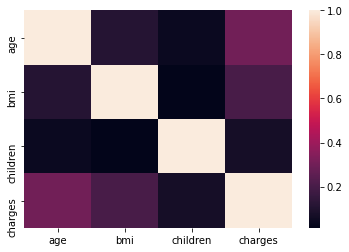

In [6]:
sns.heatmap(df.corr())

<AxesSubplot:xlabel='smoker', ylabel='charges'>

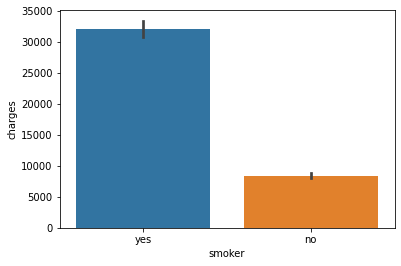

In [7]:
sns.barplot('smoker', 'charges',  data=df)

<AxesSubplot:xlabel='sex', ylabel='charges'>

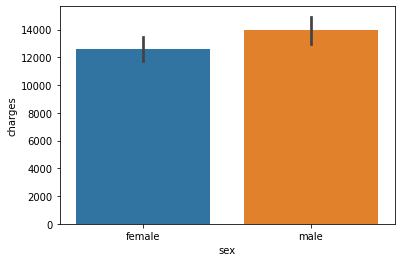

In [8]:
sns.barplot('sex', 'charges',  data=df)

<AxesSubplot:xlabel='children', ylabel='charges'>

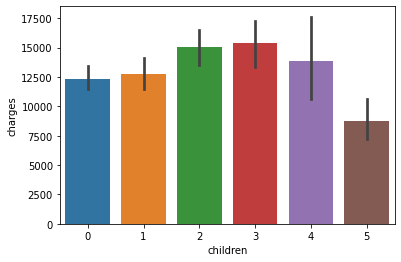

In [9]:
sns.barplot('children', 'charges',  data=df)

## Data Cleaning

In [10]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [11]:
df.smoker = df.smoker.map({'yes': 1, 'no': 0})

In [12]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [13]:
df.sex = df.sex.map({'male': 1, 'female': 0})

In [14]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [15]:
df2 = pd.get_dummies(df, drop_first=True)
df2.sample(5)

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
625,29,0,26.030,0,0,3736.46470,1,0,0
776,40,1,32.300,2,0,6986.69700,1,0,0
1044,55,1,35.245,1,0,11394.06555,0,0,0
357,47,1,29.830,3,0,9620.33070,1,0,0
41,31,0,36.630,2,0,4949.75870,0,1,0


## Data Preprocessing and model creation

In [16]:
X = df2.drop('charges', axis=1)
y = df2['charges']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [18]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [19]:
# Score on train set
model.score(X_train, y_train)

0.758107028032409

In [20]:
# Score on test set
model.score(X_test, y_test)

0.7113792545641497

In [21]:
model.predict([X_test.iloc[0]])

array([3037.937431])

In [22]:
y_test.iloc[0]

4906.40965

In [23]:
y_pred = model.predict(X_test)

In [24]:
mean_absolute_error(y_test, y_pred)

4347.565753543704

In [25]:
# Weights
model.coef_

array([  257.54092872,  -708.38192326,   362.04666022,   527.24233813,
       24239.68046201,  -574.24732161, -1303.34208123, -1116.1194809 ])

In [26]:
# Bias
model.intercept_

-12237.001025922178

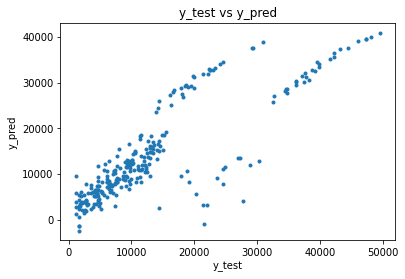

In [27]:
plt.scatter(y_test, y_pred, marker='.')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.title('y_test vs y_pred')
plt.show()